In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Create sequence: 1 to 100
sequence = np.array([i for i in range(1,101)])
# define window size (e.g., 3 inputs -> 1 output)
window_size = 3
X=[]
Y=[]
# Create input-output pairs
for i in range(len(sequence)-window_size):
    X.append(sequence[i:i+window_size])
    Y.append(sequence[i+window_size])
# Convert to numpy arrays
X=np.array(X)
Y=np.array(Y)
# Reshape X to [samples, timestamps, features]
X=X.reshape((X.shape[0], X.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size,1)))
model.add(Dense(1)) # Output layer
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X, Y, epochs=800, verbose=0)
print("Training Completed.")

Training Completed.


In [ ]:
test_input = np.array([15,16,17])
test_intput = test_input.reshape((1,window_size,1)) # Reshape for prediction
predicted = model.predict(test_intput) # Predict the next number
print(f"Predicted next number : {predicted[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Predicted next number : 17.96


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


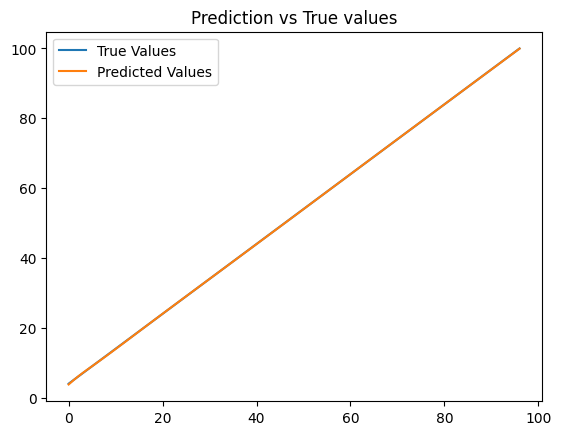

In [ ]:
predictions = model.predict(X)
plt.plot(Y,label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.title("Prediction vs True values")
plt.show()

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('/content/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
import numpy as np

# Ask the user to enter a sequence of numbers
input_str = input("Enter your input sequence (e.g., 11 12 13): ")

# Convert input to NumPy array of shape (1, window_size, 1)
input_list = list(map(float, input_str.strip().split()))
window_size = len(input_list)  # infer window size from user input

my_input = np.array(input_list).reshape((1, window_size, 1))

# Get prediction from the loaded model
my_prediction = loaded_model.predict(my_input)

# Print input and predicted output
print(f"Input: {my_input.flatten()}")
print(f"Predicted output: {my_prediction[0][0]}")


Enter your input sequence (e.g., 11 12 13): 221 222 223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Input: [221. 222. 223.]
Predicted output: 224.64703369140625
